Step 21: the distribution of clusters as independent varaible, are used to train logistic regression model. Their classification report, confussion matrix and coefficients are computed.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter as counter
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

%matplotlib inline

In [2]:
df = pd.read_csv('PSG_4_Clustering.csv')
df.head()

cluster1  cluster2  cluster3  cluster4  clust1_proportion(%)  \
0     474.0     401.0      60.0       1.0             50.641026   
1     258.0     142.0      90.0     462.0             27.100840   
2     540.0     331.0      49.0      79.0             54.054054   
3     235.0     521.0     123.0      24.0             26.024363   
4     615.0     267.0     140.0      38.0             58.018868   

   clust2_proportion(%)  clust3_proportion(%)  clust4_proportion(%)  \
0             42.841880              6.410256              0.106838   
1             14.915966              9.453782             48.529412   
2             33.133133              4.904905              7.907908   
3             57.696567             13.621262              2.657807   
4             25.188679             13.207547              3.584906   

          fname  label  
0  A0000724.edf      0  
1  A0000737.edf      0  
2  A0000773.edf      0  
3  A0000934.edf      1  
4  A0000960.edf      1

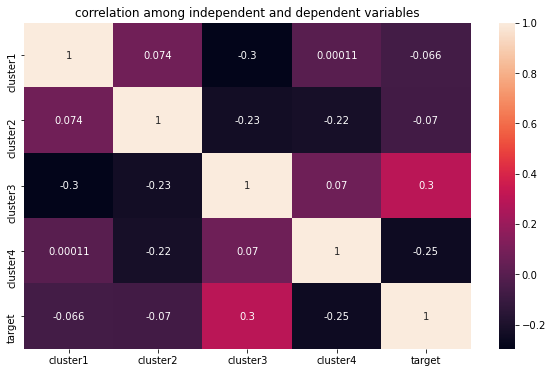

In [3]:
X_df = df[['cluster1', 'cluster2', 'cluster3', 'cluster4']]
y = df['label']
X = StandardScaler().fit_transform(X_df)
df_p = pd.DataFrame(data=X, columns=['cluster1', 'cluster2', 'cluster3', 'cluster4'])
df_p['target'] = y
plt.figure(figsize=(10,6))
plt.title('correlation among independent and dependent variables')
sns.heatmap(df_p.corr(), annot=True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [5]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
predicted = model.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



C:\Users\Shahzeb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
print(confusion_matrix(y_test, predicted))

[[0 1]
 [0 2]]


In [8]:
predicted = model.predict(X_train)
print(classification_report(y_train, predicted))

              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       0.76      1.00      0.86        16

    accuracy                           0.79        24
   macro avg       0.88      0.69      0.71        24
weighted avg       0.84      0.79      0.76        24



In [9]:
print(confusion_matrix(y_train, predicted))

[[ 3  5]
 [ 0 16]]


In [10]:
model.coef_

array([[ 0.02512219, -0.08202568,  0.78714629, -0.52753818]])

In [12]:
k_fold = KFold(n_splits=10)
accuracy_array = []

LR = LogisticRegression(random_state=0)
for k, (train, test) in enumerate(k_fold.split(X, y)):
    LR.fit(X[train], y[train])
    accuracy_array.append(LR.score(X[test], y[test]))
    print('cross validation fold {} result: {}' .format(k, LR.score(X[test], y[test])))
print('\n')
print('average accuracy of K-fold: {}' .format(np.mean(accuracy_array)))

cross validation fold 0 result: 0.3333333333333333
cross validation fold 1 result: 1.0
cross validation fold 2 result: 0.0
cross validation fold 3 result: 0.6666666666666666
cross validation fold 4 result: 0.6666666666666666
cross validation fold 5 result: 0.3333333333333333
cross validation fold 6 result: 0.3333333333333333
cross validation fold 7 result: 0.5
cross validation fold 8 result: 0.5
cross validation fold 9 result: 0.5


average accuracy of K-fold: 0.4833333333333333


In [14]:
accuracy_average = []
loo = LeaveOneOut()
loo.get_n_splits(X)
i = 0

for train, test in loo.split(X):
    
    LR.fit(X[train], y[train])
    accuracy_average.append(LR.score(X[test], y[test]))
    print('cross validation fold {} result: {}' .format(i, LR.score(X[test], y[test])))
    i += 1
    
print('\naverage accuracy of one leave out CV: {}' .format(np.mean(accuracy_average)))

warnings.filterwarnings('ignore', category=UserWarning, append=True)

cross validation fold 0 result: 0.0
cross validation fold 1 result: 1.0
cross validation fold 2 result: 0.0
cross validation fold 3 result: 1.0
cross validation fold 4 result: 1.0
cross validation fold 5 result: 1.0
cross validation fold 6 result: 0.0
cross validation fold 7 result: 0.0
cross validation fold 8 result: 0.0
cross validation fold 9 result: 0.0
cross validation fold 10 result: 1.0
cross validation fold 11 result: 1.0
cross validation fold 12 result: 1.0
cross validation fold 13 result: 1.0
cross validation fold 14 result: 1.0
cross validation fold 15 result: 1.0
cross validation fold 16 result: 0.0
cross validation fold 17 result: 1.0
cross validation fold 18 result: 1.0
cross validation fold 19 result: 0.0
cross validation fold 20 result: 0.0
cross validation fold 21 result: 0.0
cross validation fold 22 result: 1.0
cross validation fold 23 result: 1.0
cross validation fold 24 result: 0.0
cross validation fold 25 result: 0.0
cross validation fold 26 result: 1.0

average ac

Applying support vector machine estimator

In [17]:
# https://towardsdatascience.com/svm-hyper-parameter-tuning-using-gridsearchcv-49c0bc55ce29

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['rbf', 'poly', 'sigmoid']}
              
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [18]:
print(grid.best_estimator_)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [24]:
svm = SVC(C=.1, gamma=1, kernel='rbf', random_state=0)
svm.fit(X_train, y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [25]:
predictions = svm.predict(X_train)
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.67      1.00      0.80        16

    accuracy                           0.67        24
   macro avg       0.33      0.50      0.40        24
weighted avg       0.44      0.67      0.53        24



In [26]:
k_fold = KFold(n_splits=10, random_state=1)
accuracy_array = []

SVM = SVC(C=.1, gamma=1, kernel='rbf', random_state=0)
for k, (train, test) in enumerate(k_fold.split(X, y)):
    SVM.fit(X[train], y[train])
    accuracy_array.append(SVM.score(X[test], y[test]))
    print('cross validation fold {} result: {}' .format(k, SVM.score(X[test], y[test])))
    
print('\naverage accuracy of 10-fold: {}' .format(np.mean(accuracy_array)))

cross validation fold 0 result: 0.0
cross validation fold 1 result: 1.0
cross validation fold 2 result: 0.0
cross validation fold 3 result: 1.0
cross validation fold 4 result: 1.0
cross validation fold 5 result: 1.0
cross validation fold 6 result: 1.0
cross validation fold 7 result: 1.0
cross validation fold 8 result: 0.5
cross validation fold 9 result: 0.0

average accuracy of 10-fold: 0.65


C:\Users\Shahzeb\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [27]:
accuracy_array = []
loo = LeaveOneOut()
loo.get_n_splits(X)
i = 0

SVM = SVC(C=.1, gamma=1, kernel='rbf', random_state=0)
for train, test in loo.split(X):
    SVM.fit(X[train], y[train])
    accuracy_array.append(SVM.score(X[test], y[test]))
    print('cross validation fold {} result: {}' .format(i, SVM.score(X[test], y[test])))
    i += 1
print('\naverage accuracy of one leave out CV: {}' .format(np.mean(accuracy_array)))

warnings.filterwarnings('ignore', category=UserWarning, append=True)

cross validation fold 0 result: 0.0
cross validation fold 1 result: 0.0
cross validation fold 2 result: 0.0
cross validation fold 3 result: 1.0
cross validation fold 4 result: 1.0
cross validation fold 5 result: 1.0
cross validation fold 6 result: 0.0
cross validation fold 7 result: 0.0
cross validation fold 8 result: 0.0
cross validation fold 9 result: 1.0
cross validation fold 10 result: 1.0
cross validation fold 11 result: 1.0
cross validation fold 12 result: 1.0
cross validation fold 13 result: 1.0
cross validation fold 14 result: 1.0
cross validation fold 15 result: 1.0
cross validation fold 16 result: 1.0
cross validation fold 17 result: 1.0
cross validation fold 18 result: 1.0
cross validation fold 19 result: 1.0
cross validation fold 20 result: 1.0
cross validation fold 21 result: 1.0
cross validation fold 22 result: 1.0
cross validation fold 23 result: 1.0
cross validation fold 24 result: 0.0
cross validation fold 25 result: 0.0
cross validation fold 26 result: 0.0

average ac